In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [7]:
df = pd.read_csv('D:\DataSci\Resources\medical_insurance_dataset.csv', header=None)
df.head(5)

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [8]:
df.dtypes

0     object
1      int64
2    float64
3      int64
4     object
5      int64
6    float64
dtype: object

In [10]:
headers = ['Age','Gender','BMI','Children', 'Smoker', 'Region', 'Charges']
df.columns = headers



,Age,Gender,BMI,Children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [11]:
df.dtypes

Age          object
Gender        int64
BMI         float64
Children      int64
Smoker       object
Region        int64
Charges     float64
dtype: object

In [ ]:
df.replace('?', np.NaN, inplace=True)

In [ ]:
mean_age = df['Age'].astype('float').mean(axis=0)
df["Age"].replace(np.nan, mean_age, inplace=True)

In [ ]:
is_smoker = df['Smoker'].value_counts().idxmax()
df["Smoker"].replace(np.nan, is_smoker, inplace=True)


In [29]:
df['Age'] = df['Age'].astype(int)

In [30]:
df['Smoker']= df['Smoker'].astype(int)

In [31]:
df['Charges'] = df['Charges'].round(2)

In [32]:
print(df.head(5))

   Age  Gender     BMI  Children  Smoker  Region   Charges
0   19       1  27.900         0       1       3  16884.92
1   18       2  33.770         1       0       4   1725.55
2   28       2  33.000         3       0       4   4449.46
3   33       2  22.705         0       0       1  21984.47
4   32       2  28.880         0       0       1   3866.86


In [33]:
df.dtypes

Age           int32
Gender        int64
BMI         float64
Children      int64
Smoker        int32
Region        int64
Charges     float64
dtype: object

<Axes: xlabel='BMI', ylabel='Charges'>

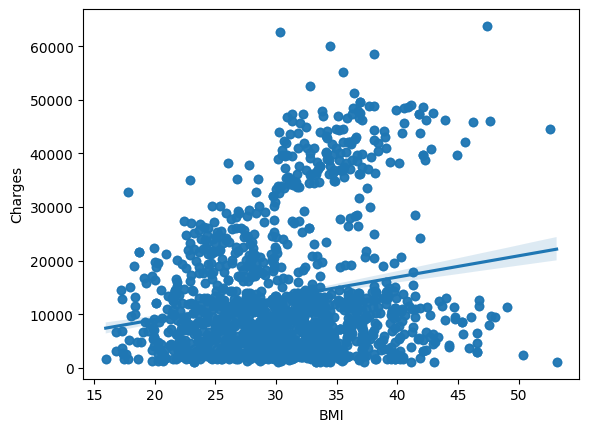

In [35]:
sns.regplot(x=df['BMI'], y=df['Charges'])

<Axes: xlabel='Smoker', ylabel='Charges'>

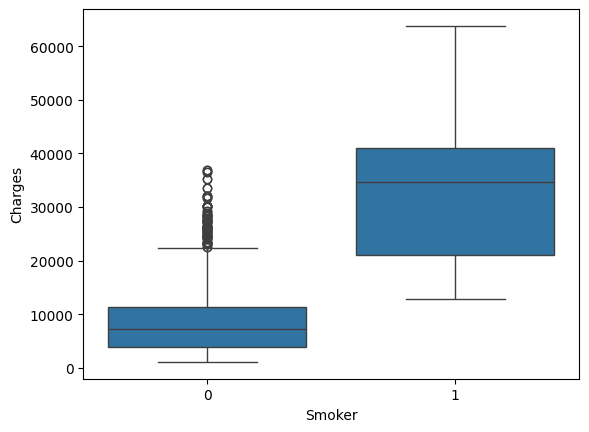

In [37]:
sns.boxplot(df, x='Smoker', y='Charges')

In [38]:
df.corr()

,Age,Gender,BMI,Children,Smoker,Region,Charges
Age,1.000000,-0.026046,0.113048,0.037574,-0.023286,-0.007167,0.298624
Gender,-0.026046,1.000000,0.042924,0.016020,0.082326,0.022213,0.062837
BMI,0.113048,0.042924,1.000000,-0.001492,0.011489,0.271119,0.199846
Children,0.037574,0.016020,-0.001492,1.000000,0.006362,-0.025717,0.066442
Smoker,-0.023286,0.082326,0.011489,0.006362,1.000000,0.054077,0.788783
Region,-0.007167,0.022213,0.271119,-0.025717,0.054077,1.000000,0.054058
Charges,0.298624,0.062837,0.199846,0.066442,0.788783,0.054058,1.000000


In [39]:
# smoker- non-smoker is a good indicator, age is a good indicator, bmi is a good indicator

In [47]:
lr = LinearRegression()
x_data = df.drop('Charges', axis=1)
y_data = df["Charges"]

lr.fit(x_data[['Smoker']], y_data)
print(lr.score(x_data[['Smoker']], y_data))

0.6221791733924185


In [51]:
input = [('scale', StandardScaler()), ('poly', PolynomialFeatures()), ('lr', LinearRegression())]
pipe = Pipeline(input)
pipe.fit(x_data,y_data)
y_pipe = pipe.predict(x_data)
from sklearn.metrics import r2_score
print(r2_score(y_data,y_pipe))

0.8452197128107104


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)


In [53]:
r = Ridge(alpha = 0.1)
r.fit(x_train, y_train)
print(r.score(x_test, y_test))

0.7469894680059708


In [55]:
p = PolynomialFeatures(degree=2)
x_train_p = p.fit_transform(x_train)
x_test_p = p.fit_transform(x_test)
lre = LinearRegression()
lre.fit(x_train_p, y_train)
print(lre.score(x_test_p, y_test))

0.8409699383041711


C:\Users\Ojas\AppData\Local\Temp\ipykernel_10776\1403494434.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_data,color='red', hist=False)
C:\Users\Ojas\AppData\Local\Temp\ipykernel_10776\1403494434.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(lre.predic

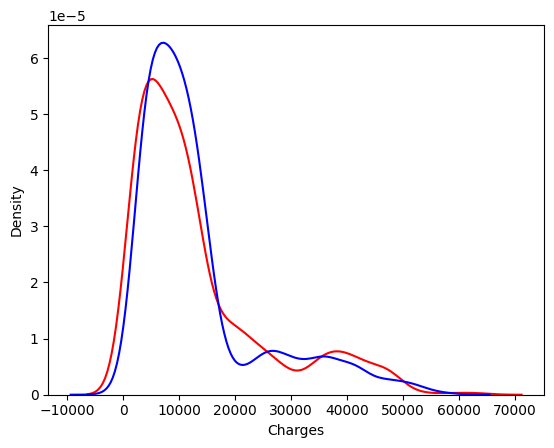

In [56]:
ax1 = sns.distplot(y_data,color='red', hist=False)
ax2 = sns.distplot(lre.predict(p.fit_transform(x_data)), color='blue', hist=False)